In [3]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

import matplotlib.pyplot as plt
import cv2
import numpy as np

c:\kannan\code\playground\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
#url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
#image = Image.open(requests.get(url, stream=True).raw)

image = Image.open(r"C:\Users\kanna\OneDrive\Documents\WhatsApp Image 2024-03-30 at 13.06.41_f705befd.jpg")



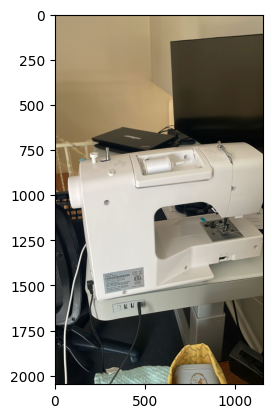

In [16]:
plt.imshow(image)

In [18]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: sewing machine


In [15]:
len(model.config.id2label)

1000

In [19]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
#from datasets import load_dataset

#dataset = load_dataset("huggingface/cats-image")
#image = dataset["test"]["image"][0]

processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

inputs = processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


sewing machine


In [13]:
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]


c:\kannan\code\playground\.venv\Lib\site-packages\datasets\load.py:1461: FutureWarning: The repository for huggingface/cats-image contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/huggingface/cats-image
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Generating test split: 1 examples [00:00, 104.55 examples/s]


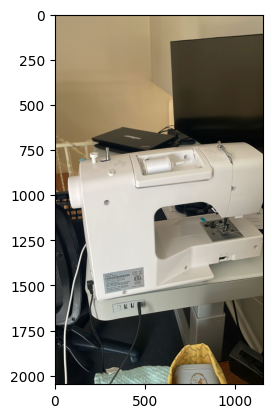

In [20]:
plt.imshow(image)

In [22]:
#image = Image.open(r"C:\Users\kanna\OneDrive\Documents\categories.jpg")
#image = Image.open(r"C:\Users\kanna\OneDrive\Documents\dog_bike_car.jpg")
image = Image.open(r"C:\Users\kanna\OneDrive\Documents\objects.jpg")

In [23]:

#object detection

from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
#url = "https://www.google.com/url?sa=i&url=http%3A%2F%2Fdjl.ai%2Fexamples%2Fdocs%2Fobject_detection.html&psig=AOvVaw2QgeuBpnEx2hkW5wOEAb_U&ust=1711908685402000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCICzuvvKnIUDFQAAAAAdAAAAABAD"
#image = Image.open(requests.get(url, stream=True).raw)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

bx_results = []
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    bx_results.append(box)
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected spoon with confidence 0.912 at location [237.37, 76.2, 390.41, 183.4]
Detected cup with confidence 0.996 at location [500.33, 73.72, 642.86, 206.22]
Detected remote with confidence 0.999 at location [463.68, 386.14, 655.74, 520.06]


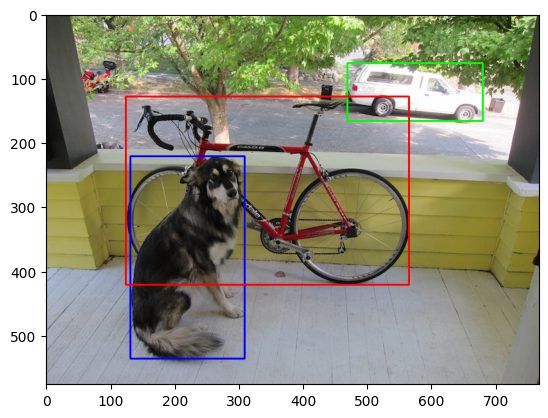

In [7]:

x0, y0, x1, y1 = 131, 221, 309, 536
image1= np.array(image)
cv2.rectangle(image1, (x0,y0),(x1,y1), (0,0,255),2 )
x0, y0, x1, y1 = 469, 76, 680, 166
cv2.rectangle(image1, (x0,y0),(x1,y1), (0,255,0),2 )

x0, y0, x1, y1 = 124, 128, 565, 421
cv2.rectangle(image1, (x0,y0),(x1,y1), (255,0,0),2 )
#cv2.imwrite('test.jpg', image1)
plt.imshow(image1)



[237, 76, 390, 183]
[500, 73, 642, 206]
[463, 386, 655, 520]


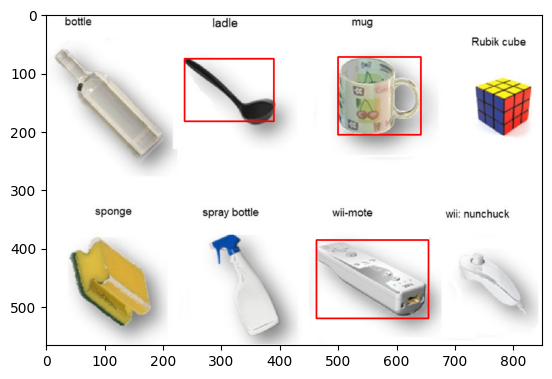

In [24]:
bx_results_1 = []
image1= np.array(image)

for box in bx_results:
    box_1 = [int(i) for i in box]
    x0, y0, x1, y1 = box_1
    cv2.rectangle(image1, (x0,y0),(x1,y1), (255,0,0),2 )
    print(box_1)

plt.imshow(image1)   


In [25]:
from transformers import pipeline

In [26]:
chatbot = pipeline(task="conversational",
                   model="./models/facebook/blenderbot-400M-distill")

OSError: Incorrect path_or_model_id: './models/facebook/blenderbot-400M-distill'. Please provide either the path to a local folder or the repo_id of a model on the Hub.